<a href="https://colab.research.google.com/github/Ayushn24/Gradient-Descent-from-scratch/blob/main/Gradient_descent_Implementation_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
class GradientDescentOptimizer:

    def __init__(self, epochs=1000, lr=0.01, lr_f=0.0001, loss="mse", random_state=42,
                 tolerance=0.0000001, variable_lr=False, early_stopping=False):

        self.epochs = epochs                   # Maximum number of iterations
        self.lr = lr                           # Initial learning rate
        self.lr_f = lr_f                       # Final learning rate (for exponential decay if "variable_lr" is True)
        self.loss = loss                       # Loss function (only "mse" supported)
        self.random_state = random_state       # Seed for reproducibility
        self.tolerance = tolerance             # Convergence threshold - Difference between two consecutive losses
        self.variable_lr = variable_lr         # Whether to use decay learning rate
        self.early_stopping = early_stopping   # Whether to stop early on convergence and prevent overtraining
        self.errors = []                       # Stores error per epoch
        self.w = None                          # Weights
        self.b = None                          # Bias
        self.lr_decay = []                     # Stores learning rate history

    def optimize(self, features, targets): # The features and targets should be pandas Series or DataFrames
        # Convert inputs to numpy arrays for efficient computation
        if isinstance(features, pd.Series):
            features = features.to_frame()
        sample_num, feature_num = features.shape

        feature_arr = features.to_numpy().reshape(sample_num, feature_num)
        targets_arr = targets.to_numpy().reshape(sample_num, 1)

        # Initialize weights and bias (small random values)
        np.random.seed(self.random_state)
        self.w = np.random.rand(feature_num, 1) * 0.01
        self.b = np.random.rand(1, 1) * 0.01

        # Store the initial learning rate to init_lr variable for later learning rate calculations if using variable learning rate
        if self.variable_lr:
            init_lr = self.lr

        # Calculate the learning rate decay constant 'k' (if variable_lr is enabled)
        if self.variable_lr:
            k = (np.log(self.lr / self.lr_f)) / self.epochs

        # Main training loop
        for e in range(1, self.epochs + 1):
            # Forward pass: compute predictions
            y_pred = np.dot(feature_arr, self.w) + self.b

            # Compute error based on loss function
            if self.loss == "mse":
                error = y_pred - targets_arr
                mse_loss = np.mean(error ** 2)

            # Backpropagation: compute gradients
            if self.loss == "mse":
                dw = (2 / sample_num) * np.dot(feature_arr.T, error)  # Gradient w.r.t. weights
                db = (2 / sample_num) * np.sum(error)                 # Gradient w.r.t. bias

            # Store current learning rate before update
            self.lr_decay.append(self.lr)
            # Parameter update step
            self.w -= self.lr * dw
            self.b -= self.lr * db

            # Update learning rate if variable_lr is True
            if self.variable_lr:
                self.lr = init_lr * np.exp(-k * e)

            # Store current loss
            self.errors.append(mse_loss)

            # Check convergence (if early stopping is enabled)
            if self.early_stopping and e > 1:
                if abs(self.errors[-1] - self.errors[-2]) < self.tolerance:
                    return f"[Early_Stopping - ON] Early convergence achieved successfully at {e} epochs !!!"
                # If not converged, simply continue
                elif abs(self.errors[-1] - self.errors[-2]) > self.tolerance:
                    pass

        # Final convergence message depending on settings
        if abs(self.errors[-1] - self.errors[-2]) < self.tolerance and not self.early_stopping:
            return f"[Early_Stopping - OFF] Successful convergence at {self.epochs} epochs !!!"
        elif abs(self.errors[-1] - self.errors[-2]) > self.tolerance and not self.early_stopping:
            return f"[Early_Stopping - OFF] Convergence failed at {self.epochs} epochs. Try changing parameters or increase the number of epochs."
        elif abs(self.errors[-1] - self.errors[-2]) > self.tolerance and self.early_stopping:
            return f"[Early_Stopping - ON] Convergence failed at {self.epochs} epochs. Try changing parameters or increase the number of epochs."


In [3]:
df_1= pd.DataFrame({"f":[1,2,3,4,5,6,7,8,9,10],
                     "t":[3,6,9,12,15,18,21,24,27,30]
                     })
df_1 # y = 3x +0, so here w is 3 and b is 0. Lets see whether the gradient descent algorithm can find the right value of w and b.

,f,t
0,1,3
1,2,6
2,3,9
3,4,12
4,5,15
5,6,18
6,7,21
7,8,24
8,9,27
9,10,30


In [4]:
x = df_1[["f"]]
y = df_1[["t"]]

In [5]:
# Lets try optimizing parameters without early_stopping

In [6]:
optimizer_1 = GradientDescentOptimizer(epochs = 1000, variable_lr= True,early_stopping=False)

In [7]:
optimizer_1.optimize(features = x, targets = y) # Convergence failed . We will increase epochs in the next run.

'[Early_Stopping - OFF] Convergence failed at 1000 epochs. Try changing parameters or increase the number of epochs.'

In [23]:
print(f"The optimal weights is {optimizer_1.w} and optimal bias is {optimizer_1.b}") # 2.97 is close to 3 but we want something more close like 2.99.  0.17 for bias is not that close to 0, we want something like 0.0...4

The optimal weights is [[2.9749764]] and optimal bias is [[0.17420988]]


Text(0, 0.5, 'Learning Rate')

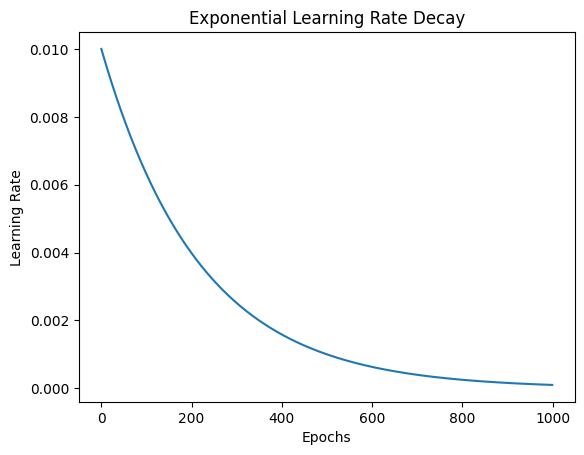

In [20]:
plt.plot(optimizer_1.lr_decay)
plt.title("Exponential Learning Rate Decay")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")

Text(0, 0.5, 'Mean Squared Errors')

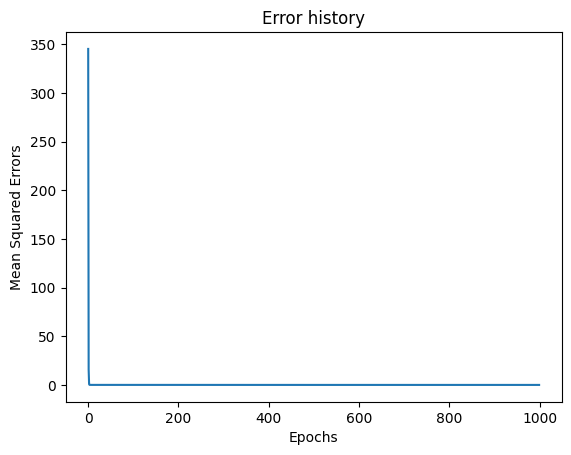

In [22]:
plt.plot(optimizer_1.errors)
plt.title("Error history")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Errors")

In [8]:
optimizer_2 = GradientDescentOptimizer(epochs = 2500, variable_lr= True,early_stopping=False)

In [9]:
optimizer_2.optimize(features = x, targets = y) # Convergence achieved!!!

'[Early_Stopping - OFF] Successful convergence at 2500 epochs !!!'

In [10]:
print(f"The optimal weights is {optimizer_2.w} and optimal bias is {optimizer_2.b}")  # 2.99 is very much close to 3 , 0.04 is also very close to 0. so it almost satisfies y = 3x

The optimal weights is [[2.99354934]] and optimal bias is [[0.04490837]]


Text(0, 0.5, 'Learning Rate')

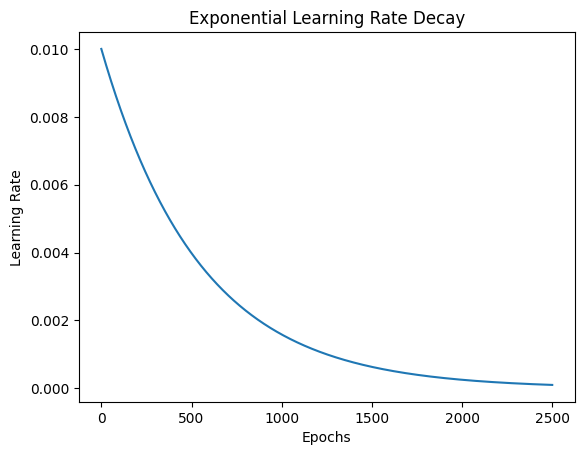

In [11]:
plt.plot(optimizer_2.lr_decay)
plt.title("Exponential Learning Rate Decay")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")

Text(0, 0.5, 'Mean Squared Errors')

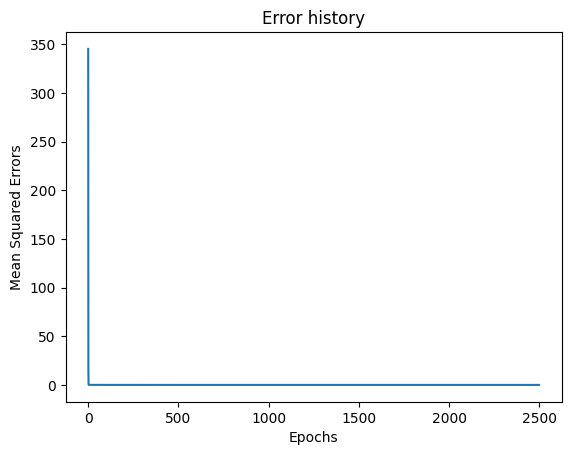

In [12]:
plt.plot(optimizer_2.errors)
plt.title("Error history")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Errors")

In [13]:
#Now lets try with Early_stopping set to True

In [14]:
optimizer_3 = GradientDescentOptimizer(epochs = 2500, variable_lr= True,early_stopping=True)

In [15]:
optimizer_3.optimize(features = x, targets = y) # With early stopping on we achieved convergence at 1991 epochs not the full 2500 epochs.

'[Early_Stopping - ON] Early convergence achieved successfully at 1991 epochs !!!'

In [16]:
print(f"The optimal weights is {optimizer_3.w} and optimal bias is {optimizer_3.b}") # 2.99 is very much close to 3 , 0.04 is also very close to 0. so it almost satisfies y = 3x

The optimal weights is [[2.9933165]] and optimal bias is [[0.04652936]]


Text(0, 0.5, 'Learning Rate')

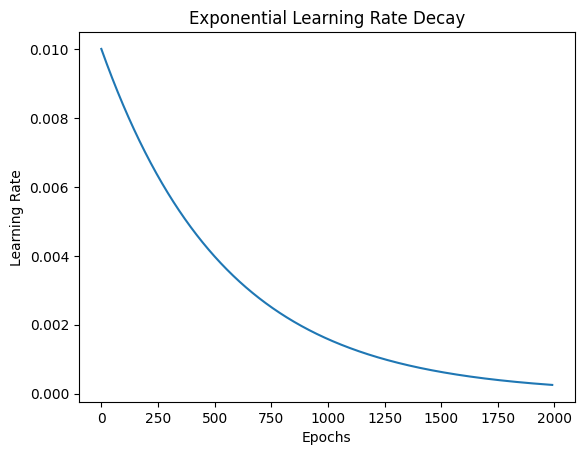

In [17]:
plt.plot(optimizer_3.lr_decay)
plt.title("Exponential Learning Rate Decay")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")

Text(0, 0.5, 'Mean Squared Errors')

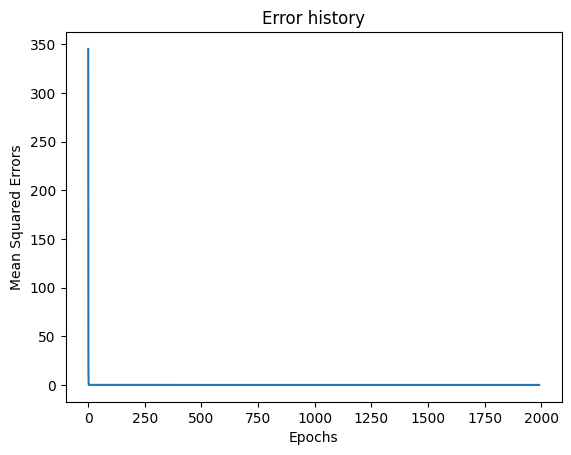

In [19]:
plt.plot(optimizer_3.errors)
plt.title("Error history")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Errors")